In [1]:
import ROOT as root
import numpy as np
import random
from timer import Timer

t = Timer()
t.start()

Welcome to JupyROOT 6.24/06


In [2]:
fileName = "data/AnaBarMC_777777.root"
treeName = "T"

f = root.TFile(fileName)
myTree = f.Get(treeName)

d = root.RDataFrame(treeName,fileName)

In [3]:
triggerCode = '''
int Analyse_Secondaries = 1;
float Theta_min_cut = 2.524;
float ThetaVerticalCut = 3.02;

int MaxHits = 50000;
int MaxPMTNo = 20;
int MaxPMTHits = 5000;
float Finger_Edep_Max = 10.0;
float AnaBar_Edep_Max = 10.0;
float pedastel_sigma = 2.9;
int Detector_Offset = 0;

int Finger_NPhotons_Max = 250;
int AnaBar_NPhotons_Max = 200;

int NUMPADDLE = 14;

int NMaxPMT = 14;

bool getTrigger(int Detector_Nhits, int* Detector_id) {

    bool fhit = false;
    bool ahit = false;
    bool trigger = false;
    for (int j=0; j<Detector_Nhits; j++) {
        if (Detector_id[j] == Detector_Offset && !fhit) {
            fhit = true;
        }
        for (int ibar=1; ibar<15; ibar++){
            if (Detector_id[j+Detector_Offset] == ibar+Detector_Offset) {
                ahit = true;
            }
        }
        if (fhit && ahit) {
            trigger = true;
        }
    }
    return trigger;
}

bool getTrigger2(bool trigger, float fNewTheta) {

    bool trigger2 = false;
    if (fNewTheta > Theta_min_cut) {
        trigger2 = true;
    }
    return trigger2;
}

bool getTrigger3(bool trigger, float fNewTheta) {

    bool trigger3 = false;
    if (fNewTheta > ThetaVerticalCut) {
        trigger3 = true;
    }
    return trigger3;
}

float getMass(int Prim_pdg) {

    float fMass;
    if (Prim_pdg == 11) {
        fMass = 0.511;
    } else {
        if (Prim_pdg == 13) {
            fMass = 105.7;
        } else {
            if (Prim_pdg == 2212) {
                fMass = 938.28;
            } else {
                fMass = 939.65;
            }
        }
    }
    return fMass;
}

float getMomentum(float Prim_E, float fMass) {
    return sqrt(Prim_E*Prim_E - fMass*fMass);
}

float getPx(float fMomentum, float Prim_Th, float Prim_Ph) {
    return fMomentum*TMath::Sin(Prim_Th)*TMath::Cos(Prim_Ph);
}

float getPy(float fMomentum, float Prim_Th, float Prim_Ph) {
    return fMomentum*TMath::Sin(Prim_Th)*TMath::Sin(Prim_Ph);
}

float getPz(float fMomentum, float Prim_Th, float Prim_Ph) {
    return fMomentum*TMath::Cos(Prim_Th);
}

float getNewTheta(float fMomentum, float fPy) {
    return TMath::ACos(fPy/fMomentum);
}

float getNewPhi(float fMomentum, float fPx, float fPz) {
    float fNewPhi;
    if (fPx < 0.0) {
        fNewPhi = TMath::ATan(fPz/fPx) + TMath::Pi();
    } else {
        if (fPx > 0.0 && fPz < 0.0) {
            fNewPhi = TMath::ATan(fPz/fPx) + TMath::TwoPi();
        } else {
            fNewPhi = TMath::ATan(fPz/fPx);
        }
    }
    return fNewPhi;
}

std::vector<float> getFingerXVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_x, int Prim_pdg) {

    std::vector<float> v;

    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_x[j]);
            }
        }
    }
    return v;
}
std::vector<float> getFingerYVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_y, int Prim_pdg) {
    
    std::vector<float> v;

    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_y[j]);
            }
        }
    }
    return v;
}
std::vector<float> getFingerZVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_z, int Prim_pdg) {
    
    std::vector<float> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_z[j]);
            }
        }
    }
    return v;
}
std::vector<float> getFingerTVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_t, int Prim_pdg) {
    
    std::vector<float> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_t[j]);
            }
        }
    }
    return v;
}

std::vector<float> getAnaBarXVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_x, int Prim_pdg) {
    
    std::vector<float> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == 1 + Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_x[j]);
            }
        }
    }
    return v;
}
std::vector<float> getAnaBarYVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_y, int Prim_pdg) {
    
    std::vector<float> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == 1 + Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_y[j]);
            }
        }
    }
    return v;
}
std::vector<float> getAnaBarZVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_z, int Prim_pdg) {
    
    std::vector<float> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == 1 + Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_z[j]);
            }
        }
    }
    return v;
}
std::vector<float> getAnaBarTVec(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg, float* Detector_t, int Prim_pdg) {
   
    std::vector<float> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == 1 + Detector_Offset && Detector_pdg[j] == Prim_pdg) {
                v.push_back(Detector_t[j]);
            }
        }
    }
    return v;
}

std::vector<int> getFingerID(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg) {
    
    std::vector<int> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == Detector_Offset) {
                v.push_back(Detector_id[j]);
            }
        }
    }
    return v;
}

std::vector<int> getFingerPDG(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg) {
    
    std::vector<int> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == Detector_Offset) {
                v.push_back(Detector_pdg[j]);
            }
        }
    }
    return v;
}

std::vector<int> getAnaBarID(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg) {

    std::vector<int> v;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == 1 + Detector_Offset) {
                v.push_back(Detector_id[j]);
            }
        }
    }
    return v;
}

std::vector<int> getAnaBarPDG(bool trigger, int Detector_Nhits, int* Detector_id, int* Detector_pdg) {
    
    std::vector<int> v;
   
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == 1 + Detector_Offset) {
                v.push_back(Detector_pdg[j]);
            }
        }
    }
    return v;
}

std::vector<float> getFingerPMTNPhotons(bool trigger, int* PMT_Nphotons) {
    
    std::vector<float> v;
    TRandom3* fRand = new TRandom3(-1);
    float pmt0tot = 0;
    

    if (trigger) {
        for (Int_t icount = 14;icount<15;icount++){
            pmt0tot += PMT_Nphotons[icount]+fRand->Gaus(0.0,pedastel_sigma);
        }
    }
    
    v.push_back(pmt0tot);
    
    return v;
}

std::vector<float> getAnaBarPMTNPhotons(bool trigger, int* PMT_Nphotons) {
    
    std::vector<float> v;
    TRandom3* fRand = new TRandom3(-1);
    float pmttot[NMaxPMT];

    if (trigger) {
        for (Int_t icount = 0;icount<14;icount++){
            pmttot[icount] = PMT_Nphotons[icount]+fRand->Gaus(0.0,pedastel_sigma);
            v.push_back(pmttot[icount]);
        }
    }
    
    return v;
}

std::vector<float> getAnaBarNPhotonsTotal(bool trigger, int* PMT_Nphotons) {
    
    std::vector<float> v;
    TRandom3* fRand = new TRandom3(-1);
    float pmttot = 0;

    if (trigger) {
        for (Int_t icount = 0;icount<14;icount++){
            pmttot = pmttot + PMT_Nphotons[icount]+fRand->Gaus(0.0,pedastel_sigma);
        }
    }
    
    v.push_back(pmttot);
    
    return v;
}

std::vector<float> getFingerEd(bool trigger, float fNewTheta, int Detector_Nhits, int Prim_pdg, int* Detector_id, int* Detector_pdg, float* Detector_Ed) {
    
    std::vector<float> v;
    float edep0tot = 0;
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] == Detector_Offset) {
                if (Analyse_Secondaries == 1 && fNewTheta > Theta_min_cut) {
                    edep0tot += Detector_Ed[j];
                }
            }
        }
    }
    
    v.push_back(edep0tot);
    
    return v;
}

std::vector<float> getAnaBarEd(bool trigger, float fNewTheta, int Detector_Nhits, int Prim_pdg, int* Detector_id, int* Detector_pdg, float* Detector_Ed) {
    
    std::vector<float> v;
    float edeptot[NMaxPMT];
    
    for (int j=0; j<NMaxPMT; j++) {
        edeptot[j]=0.0;
    }
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] > Detector_Offset && Detector_id[j] <= NMaxPMT+Detector_Offset) {
                if (Analyse_Secondaries == 1 && fNewTheta > Theta_min_cut) {
                    edeptot[Detector_id[j]-1-Detector_Offset] += Detector_Ed[j];
                } else {
                    if (Detector_pdg[j] == Prim_pdg && fNewTheta > Theta_min_cut) {
                        edeptot[Detector_id[j]-1-Detector_Offset] += Detector_Ed[j];
                    }
                }
            }
        }
    }
    
    for (int j=0; j<NMaxPMT; j++) {
        v.push_back(edeptot[j]);
    }
    
    return v;
}

std::vector<float> getAnaBarEdTotal(bool trigger, float fNewTheta, int Detector_Nhits, int Prim_pdg, int* Detector_id, int* Detector_pdg, float* Detector_Ed) {
    
    std::vector<float> v;
    float edeptotal = 0;
    float edeptot[NMaxPMT];
    
    for (int j=0; j<NMaxPMT; j++) {
        edeptot[j]=0.0;
    }
    
    for (int j=0; j < Detector_Nhits; j++) {
        if (trigger) {
            if (Detector_id[j] > Detector_Offset && Detector_id[j] <= NMaxPMT+Detector_Offset) {
                if (Analyse_Secondaries == 1 && fNewTheta > Theta_min_cut) {
                    edeptot[Detector_id[j]-1-Detector_Offset] += Detector_Ed[j];
                } else {
                    if (Detector_pdg[j] == Prim_pdg && fNewTheta > Theta_min_cut) {
                        edeptot[Detector_id[j]-1-Detector_Offset] += Detector_Ed[j];
                    }
                }
            }
        }
    }
    
    for (int j=0; j<NMaxPMT; j++) {
        edeptotal += edeptot[j];
    }
    
    v.push_back(edeptotal);
    
    return v;
}
'''

root.gInterpreter.Declare(triggerCode)


True

In [4]:
fdf = d.Define("trigger", "getTrigger(Detector_Nhits, &Detector_id[0])") \
       .Define("fMass", "getMass(Prim_pdg)") \
       .Define("fMomentum","getMomentum(Prim_E,fMass)") \
       .Define("fPx", "getPx(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPy", "getPy(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPz", "getPz(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fNewTheta", "getNewTheta(fMomentum,fPy)") \
       .Define("fNewPhi", "getNewPhi(fMomentum,fPx,fPz)") \
       .Define("trigger2", "getTrigger2(trigger,fNewTheta)") \
       .Define("trigger3", "getTrigger3(trigger,fNewTheta)") \
       .Define("fingerXVec","getFingerXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("fingerYVec","getFingerYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("fingerZVec","getFingerZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("fingerTVec","getFingerTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("anaBarXVec","getAnaBarXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("anaBarYVec","getAnaBarYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("anaBarZVec","getAnaBarZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("anaBarTVec","getAnaBarTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("fingerID","getFingerID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("fingerPDG","getFingerPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarID","getAnaBarID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarPDG","getAnaBarPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("fingerPMTNPhotons","getFingerPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarPMTNPhotons","getAnaBarPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarNPhotonsTotal","getAnaBarNPhotonsTotal(trigger,&PMT_Nphotons[0])") \
       .Define("fingerEd","getFingerEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEd","getAnaBarEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEdTotal","getAnaBarEdTotal(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])")

triggers = fdf.Filter("trigger==true").Count()
print('{} entries passed trigger'.format(triggers.GetValue()))

fdft = fdf.Filter("trigger==true")

51639 entries passed trigger


Info in <TCanvas::Print>: pdf file plots/c1RA.pdf has been created


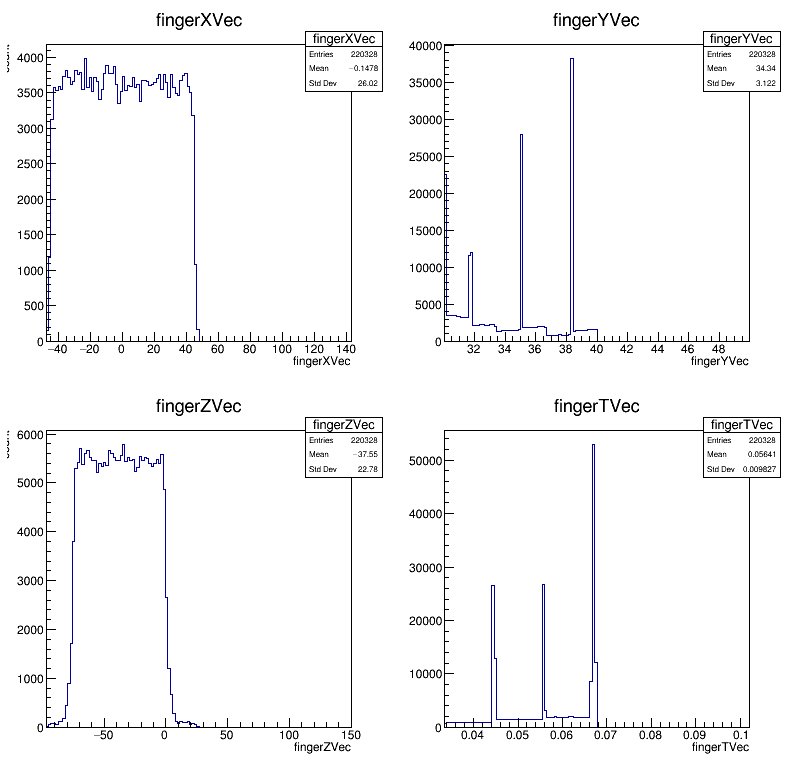

In [5]:
# Canvas 1

hFingerX = fdft.Histo1D('fingerXVec')
hFingerY = fdft.Histo1D('fingerYVec')
hFingerZ = fdft.Histo1D('fingerZVec')
hFingerT = fdft.Histo1D('fingerTVec')

c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(2,2,0.01,0.01,0)

c1.cd(1)
hFingerX.Draw()
c1.cd(2)
hFingerY.Draw()
c1.cd(3)
hFingerZ.Draw()
c1.cd(4)
hFingerT.Draw()

c1.Draw()
c1.Print("plots/c1RA.pdf");

Info in <TCanvas::Print>: pdf file plots/c2RA.pdf has been created


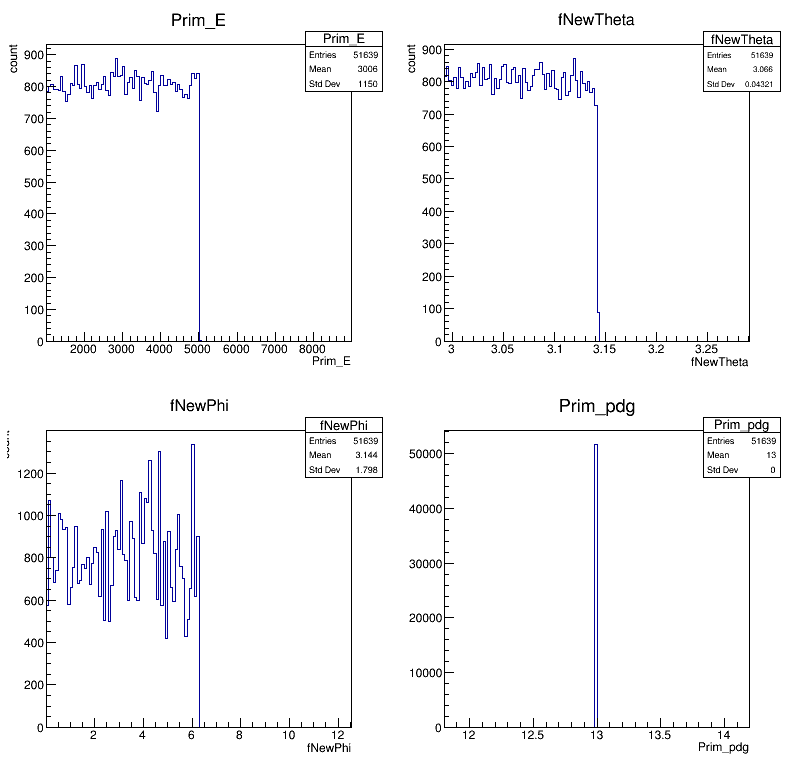

In [6]:
# Canvas 2

hPrimE = fdft.Histo1D('Prim_E')
hPrimTh = fdft.Histo1D('fNewTheta')
hPrimPh = fdft.Histo1D('fNewPhi')
hPrimPdg = fdft.Histo1D('Prim_pdg')

c2 = root.TCanvas("c2","c2",800,800)
c2.Divide(2,2,0.01,0.01,0)

c2.cd(1)
hPrimE.Draw()
c2.cd(2)
hPrimTh.Draw()
c2.cd(3)
hPrimPh.Draw()
c2.cd(4)
hPrimPdg.Draw()

c2.Draw()
c2.Print("plots/c2RA.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: pdf file plots/c3RA.pdf has been created


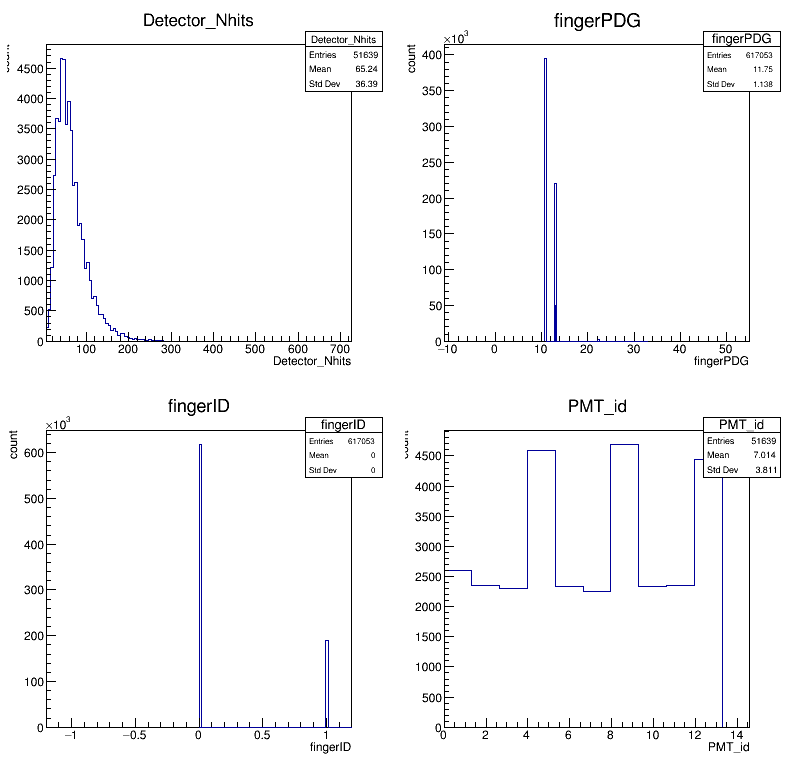

In [7]:
# Canvas 3

hDetectorNhits = fdft.Histo1D('Detector_Nhits')
hDetectorPdg = fdft.Histo1D('anaBarPDG')
hDetectorID = fdft.Histo1D('anaBarID')
hFingerPdg = fdft.Histo1D('fingerPDG')
hFingerID = fdft.Histo1D('fingerID')
hPMTID = fdft.Histo1D('PMT_id')

c3 = root.TCanvas("c2","c2",800,800)
c3.Divide(2,2,0.01,0.01,0)

c3.cd(1)
hDetectorNhits.Draw()
c3.cd(2)
hFingerPdg.Draw()
hDetectorPdg.Draw("SAME")
c3.cd(3)
hFingerID.Draw()
hDetectorID.Draw("SAME")
c3.cd(4)
hPMTID.GetXaxis().SetRangeUser(0,14)
hPMTID.Draw()

c3.Draw()
c3.Print("plots/c3RA.pdf")


Info in <TCanvas::Print>: pdf file plots/c4RA.pdf has been created


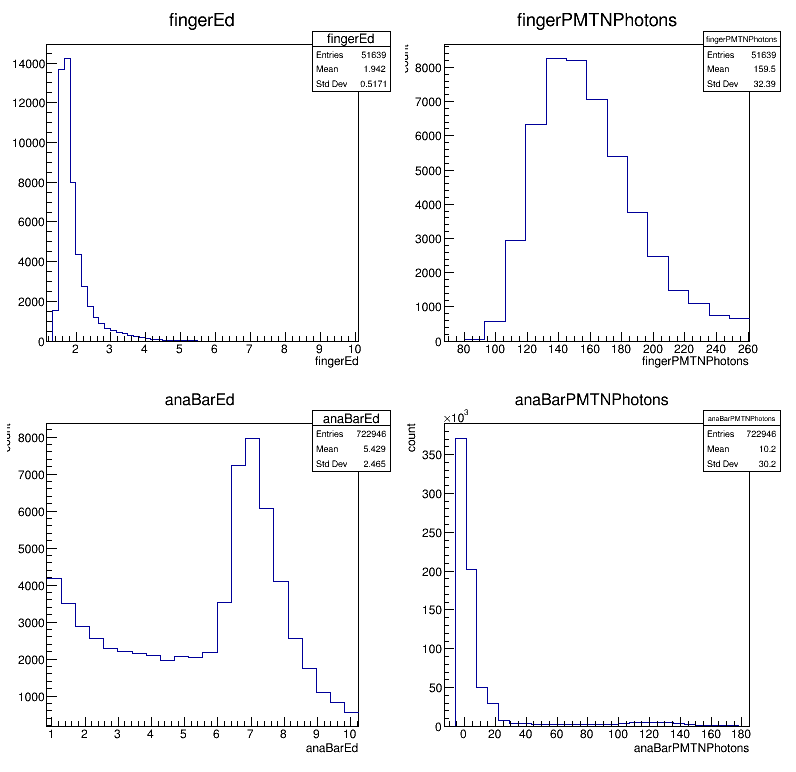

In [8]:
# Canvas 4

hFingerEd = fdft.Histo1D('fingerEd')
hFingerPMTNphot = fdft.Histo1D('fingerPMTNPhotons')
hAnaBarPMTNphot = fdft.Histo1D('anaBarPMTNPhotons')
hAnaBarEd = fdft.Histo1D('anaBarEd')

c4 = root.TCanvas("c4","c4",800,800)

c4.cd()
pad = root.TPad("pad","pad",0.01,0.51,0.50,0.99)
pad.Draw()
pad.cd()
hFingerEd.GetXaxis().SetRangeUser(1.0,10)
hFingerEd.Draw();

c4.cd()
pad = root.TPad("pad","pad",0.51,0.51,0.99,0.99)
pad.Draw()
pad.cd()
hFingerPMTNphot.GetXaxis().SetRangeUser(-10,250)
hFingerPMTNphot.Draw()

c4.cd()
pad = root.TPad("pad","pad",0.01,0.01,0.50,0.50)
#pad.SetLogy()
pad.Draw()
pad.cd()
hAnaBarEd.GetXaxis().SetRangeUser(1.0,10)
hAnaBarEd.Draw();

c4.cd()
pad = root.TPad("pad","pad",0.51,0.01,0.99,0.50)
#pad.SetLogy()
pad.Draw()
pad.cd()
hAnaBarPMTNphot.GetXaxis().SetRangeUser(-20,180)
hAnaBarPMTNphot.Draw()

c4.Draw()
c4.Print("plots/c4RA.pdf")

Info in <TCanvas::Print>: pdf file plots/c5RA.pdf has been created


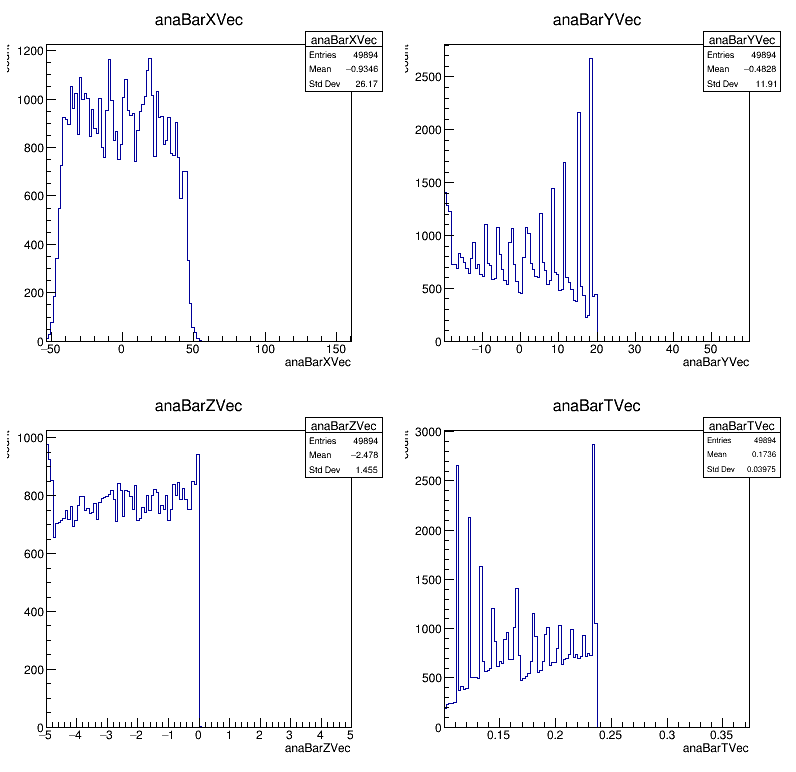

In [9]:
# Canvas 5

hAnaBarX = fdft.Histo1D('anaBarXVec')
hAnaBarY = fdft.Histo1D('anaBarYVec')
hAnaBarZ = fdft.Histo1D('anaBarZVec')
hAnaBarT = fdft.Histo1D('anaBarTVec')

c5 = root.TCanvas("c5","c5",800,800)
c5.Divide(2,2,0.01,0.01,0)

c5.cd(1)
hAnaBarX.Draw()
c5.cd(2)
hAnaBarY.Draw()
c5.cd(3)
hAnaBarZ.Draw()
c5.cd(4)
hAnaBarT.Draw()

c5.Draw()
c5.Print("plots/c5RA.pdf");

Info in <TCanvas::Print>: pdf file plots/c6RA.pdf has been created


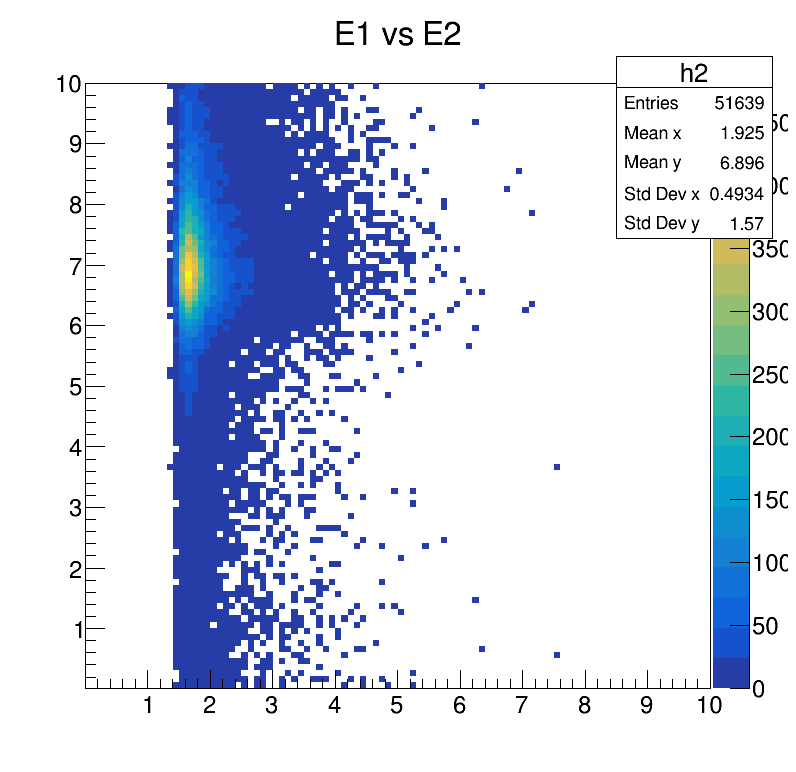

In [10]:
hE1vsE2 = fdft.Histo2D(("h2", "E1 vs E2", 100, 0.01, 10.0, 100, 0.01, 10.0),"fingerEd","anaBarEdTotal")

c6 = root.TCanvas("c6", "c6", 800, 800)
c6.Divide(1,1, 0.01, 0.01, 0)

c6.cd(1)
hE1vsE2.Draw("COLZ")

c6.Draw()
c6.Print("plots/c6RA.pdf")

In [11]:
hFinger_Edep_vs_Nphot = fdft.Filter("trigger2").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 250.0, 100, 0.01, 10.0),"fingerPMTNPhotons","fingerEd")
hAnaBar_Edep_vs_Nphot = fdft.Filter("trigger2").Histo2D(("h4", "AnaBar Edep vs NphotTotal", 100, 0.01, 10.0, 100, 0.01, 200.0),"anaBarEdTotal","anaBarNPhotonsTotal")
hNphot0_vs_Nphot1 = fdft.Filter("trigger2").Histo2D(("h5", "AnaBar NphotTotal vs Finger Nphot", 100, 0.01, 200.0, 100, 0.01, 250.0),"anaBarNPhotonsTotal","fingerPMTNPhotons")

c7 = root.TCanvas("c7", "c7", 800, 800)
c7.Divide(2,2, 0.01, 0.01, 0)

#c7PE_MeV = root.TCanvas("c7PE_MeV", "c7PE_MeV", 800,800)
#c7Profile = root.TCanvas("c7Profile", "c7Profile", 800,800)

c7.cd(1)
hFinger_Edep_vs_Nphot.Draw("COLZ")
c7.cd(2)
hAnaBar_Edep_vs_Nphot.Draw("COLZ")
c7.cd(3)
hNphot0_vs_Nphot1.Draw("COLZ")
c7.cd(4)
prof = hAnaBar_Edep_vs_Nphot.ProfileX()
prof.Fit("pol1")


****************************************
Minimizer is Linear / Migrad
Chi2                      =      1576.28
NDf                       =           98
p0                        =      4.06486   +/-   0.158018    
p1                        =      19.1206   +/-   0.0243198   


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

Info in <TCanvas::Print>: pdf file plots/c7RA.pdf has been created


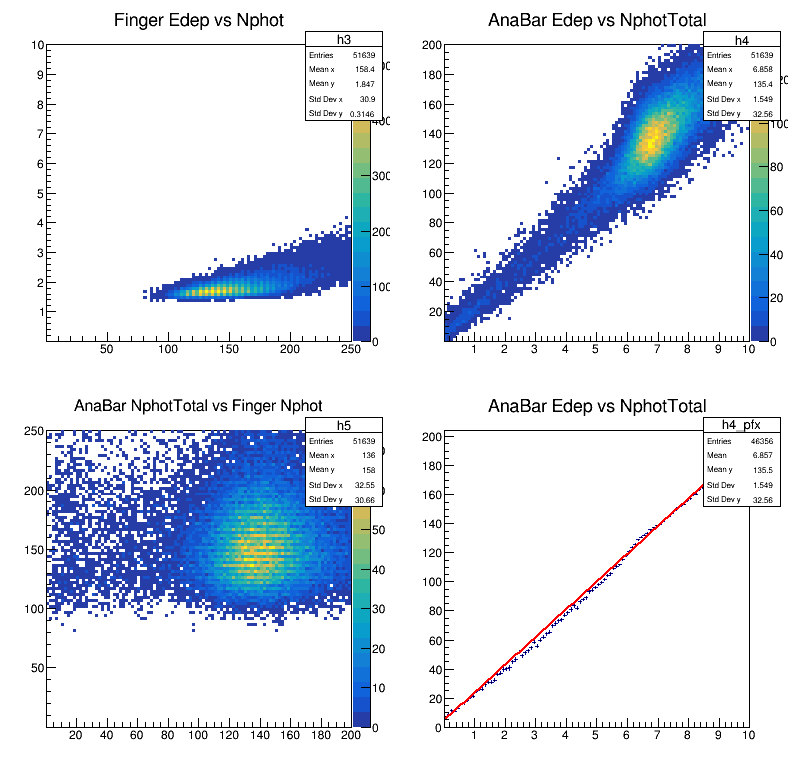

In [12]:
c7.Draw()
c7.Print("plots/c7RA.pdf")

In [13]:
hFinger_Edep_vs_NphotCut = fdft.Filter("trigger3").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 250.0, 100, 0.01, 10.0),"fingerPMTNPhotons","fingerEd")
hAnaBar_Edep_vs_NphotCut = fdft.Filter("trigger3").Histo2D(("h4", "AnaBar Edep vs Nphot", 100, 0.01, 10.0, 100, 0.01, 200.0),"anaBarEdTotal","anaBarNPhotonsTotal")
hNphot0_vs_Nphot1Cut = fdft.Filter("trigger3").Histo2D(("h5", "AnaBar Nphot vs Finger Nphot", 100, 0.01, 200.0, 100, 0.01, 250.0),"anaBarNPhotonsTotal","fingerPMTNPhotons")

c8 = root.TCanvas("c8", "c8", 800, 800)
c8.Divide(2,2, 0.01, 0.01, 0)

#c7PE_MeV = root.TCanvas("c7PE_MeV", "c7PE_MeV", 800,800)
#c7Profile = root.TCanvas("c7Profile", "c7Profile", 800,800)

c8.cd(1)
hFinger_Edep_vs_NphotCut.Draw("COLZ")
c8.cd(2)
hAnaBar_Edep_vs_NphotCut.Draw("COLZ")
c8.cd(3)
hNphot0_vs_Nphot1Cut.Draw("COLZ")
c8.cd(4)
prof = hAnaBar_Edep_vs_NphotCut.ProfileX()
prof.Fit("pol1")


****************************************
Minimizer is Linear / Migrad
Chi2                      =       1323.6
NDf                       =           98
p0                        =      4.05835   +/-   0.178617    
p1                        =      19.1024   +/-   0.0273717   


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

Info in <TCanvas::Print>: pdf file plots/c8RA.pdf has been created


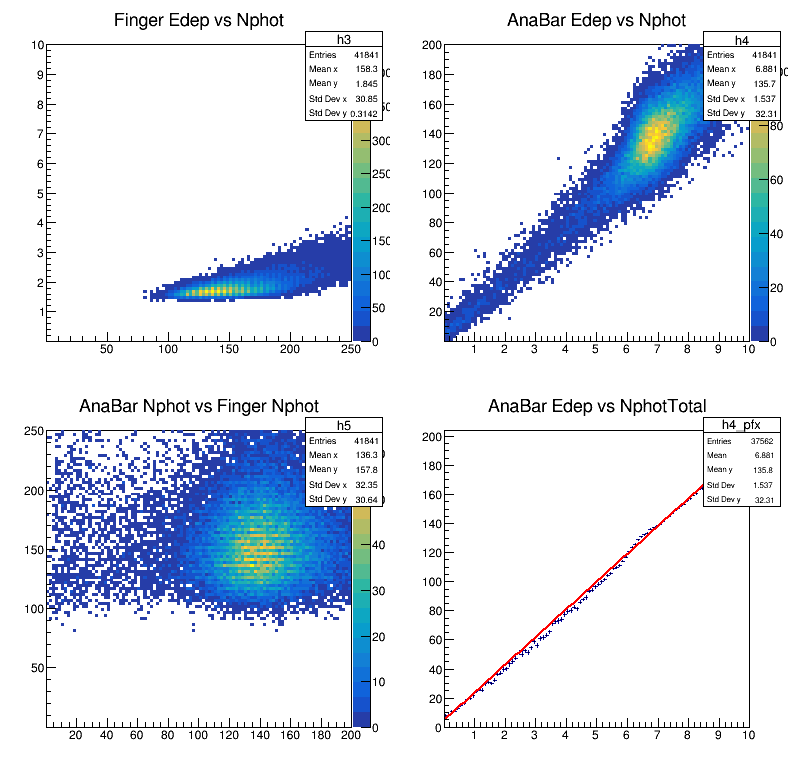

In [14]:
c8.Draw()
c8.Print("plots/c8RA.pdf")

Paddle =  1
Paddle =  2
Paddle =  3
Paddle =  4
Paddle =  5
Paddle =  6
Paddle =  7
Paddle =  8
Paddle =  9
Paddle =  10
Paddle =  11
Paddle =  12
Paddle =  13
Paddle =  14


Info in <TCanvas::Print>: pdf file plots/cEdRA.pdf has been created


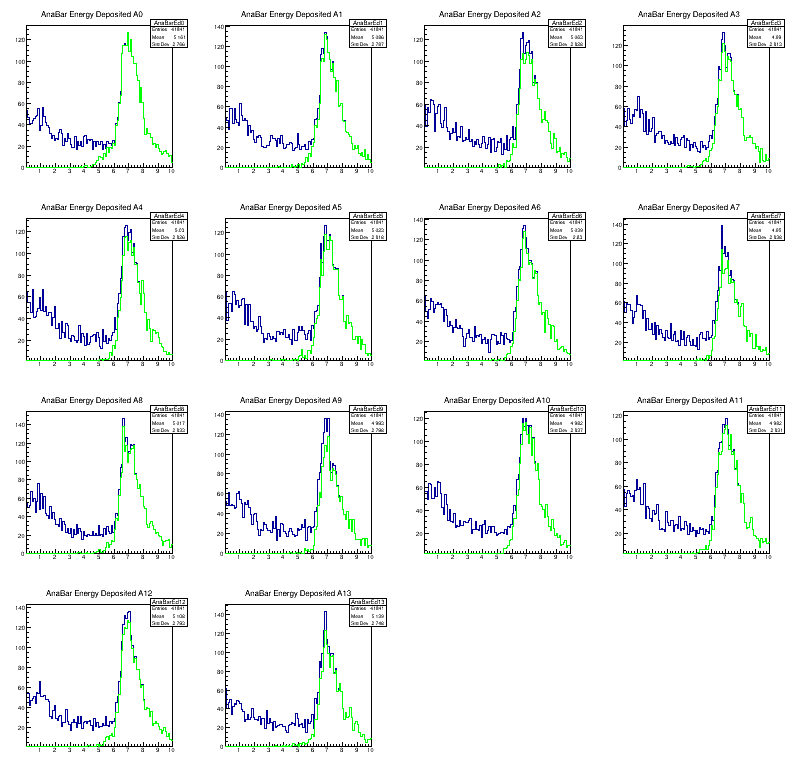

In [15]:
NUMPADDLE=14

hAnaBarEdAll = []

for i in range(NUMPADDLE):
    name = ("AnaBarEd%d" % i)
    title = ("AnaBar Energy Deposited A%d" % i)
    name2 = ("anaBarEd[%d]" %i)
    hAnaBarEdAll.append(fdft.Define(name,name2).Filter("trigger3").Histo1D((name, title, 100, 0.01, 10.0),name))
    
hAnaBarEdAllCut = []

for i in range(NUMPADDLE):
    name = ("AnaBarEd%dCut" % i)
    title = ("AnaBar Energy Deposited A%d" % i)
    name2 = ("anaBarEd[%d]" %i)
    name3 = ("trigger3 && anaBarPMTNPhotons[%d]>100.0" % i)
    hAnaBarEdAllCut.append(fdft.Define(name,name2).Filter(name3).Histo1D((name, title, 100, 0.01, 10.0),name))

cEd = root.TCanvas("cEd", "cEd", 800,800)
cEd.Divide(4,4)

means = []
meanErr = []

start = 5.5
gf = root.TF1("gf", "gaus", start, 10.0)

for i in range(NUMPADDLE):
    
    print ("Paddle = ",i+1)

    cEd.cd(i+1)
    
    hAnaBarEdAll[i].Draw()
    hAnaBarEdAllCut[i].SetLineColor(2)
    hAnaBarEdAllCut[i].Draw("SAME")
    
    #hAnaBarEdAllCut[i].Fit("gaus")
    
    #function = hAnaBarEdAllCut[i].GetFunction("gf")
    #function.SetLineColor(2)
    
    #means.append(function.GetParameter(1))
    #meanErr.append(function.GetParError(1))

#for i in range(NUMPADDLE):
#    print("Paddle " + str(i+1) + ": Mean peak Edep = " + str(means[i]) + " MeV")
#    print("    \t Mean Edep error = " +str(meanErr[i]) + " MeV")
    
#sumMeans = 0.0
#sumMeanErrSqrs = 0.0

#for i in range(NUMPADDLE):
#    sumMeans += means[i]
#    sumMeanErrSqrs += meanErr[i]*meanErr[i]

#print("Sum of mean error squares = " + str(sumMeanErrSqrs))

#meanMean = sumMeans/NUMPADDLE

#sumErr = np.sqrt(sumMeanErrSqrs)
#print("Error in sum of means = " + str(sumErr))
#meanMeanErr = sumErr/NUMPADDLE

#print("Mean peak Edep across all paddles: " + str(meanMean) + " MeV" )
#print("Mean peak Edep uncertainty: " + str(meanMeanErr) + " Mev")

cEd.Draw()
cEd.Print("plots/cEdRA.pdf")

In [16]:
hAnaBarPMTNphotArray = []

for i in range(NUMPADDLE):  
    name = ("AnaBarPMTNphotA%d" % i)
    title = ("AnaBar_PMT_Number_of_Photons_A%d" % i)
    name2 = ("anaBarPMTNPhotons[%d]" % i)
    hAnaBarPMTNphotArray.append(fdft.Define(name,name2).Filter("trigger").Histo1D((name, title, 200, -20, 180.0),name))
    
hAnaBarPMTNphotCut = []
    
for i in range(NUMPADDLE):  
    name = ("AnaBarPMTNphotA%dCut" % i)
    title = ("AnaBar_PMT_Number_of_Photons_A%d_Cut" % i)
    name2 = ("anaBarPMTNPhotons[%d]" % i)
    hAnaBarPMTNphotCut.append(fdft.Define(name,name2).Filter("trigger3").Histo1D((name, title, 200, -20, 180.0),name))
    
hAnaBarPMTNoiseCutNphot = []

for i in range(NUMPADDLE):
    name = ("AnaBarPMTNoiseCutNphotA%d" % i)
    title = ("AnaBar PMT Number of Photons A%d" % i)
    name2 = ("anaBarPMTNPhotons[%d]" % i)
    name3 = ("trigger3 && anaBarEd[%d]>4.0" % i)
    hAnaBarPMTNoiseCutNphot.append(fdft.Define(name,name2).Filter(name3).Histo1D((name, title, 200, -20, 180.0),name))

c9 = root.TCanvas("c9", "c9", 800,800)

print("Fittingi A1 ...\n")
fr = [float, float]
fp, fpe = [float, float, float, float], [float, float, float, float]
pllo = [0.05, 0.5, 1.0, 0.04]
plhi = [10.0, 50.0, 10000.0, 5.0]
sv = [1.8, 5.0, 1400.0, 3.0]
chisqr = float
ndf = int
SNRPeak, SNRFWHM = float, float


for i in range(NUMPADDLE):
        c9.cd()
        xl = 0.25*(i%4)
        xh = 0.25*(i%4)+0.25
        yl = 0.75 - 0.25*int(i/4)
        yh = 0.75 - 0.25*int(i/4) + 0.25
        print (i,xl,yl,xh,yh)
        pad = root.TPad("pad","pad",xl,yl,xh,yh)
        pad.SetLogy(True)
        pad.Draw()
        pad.cd()
        hAnaBarPMTNphotArray[i].Draw()
        hAnaBarPMTNoiseCutNphot[i].SetLineColor(2)
        hAnaBarPMTNoiseCutNphot[i].Draw("SAME")
        #hAnaBarPMTNoiseCutNphot[i].Fit("gaus")

Fittingi A1 ...

0 0.0 0.75 0.25 1.0
1 0.25 0.75 0.5 1.0
2 0.5 0.75 0.75 1.0
3 0.75 0.75 1.0 1.0
4 0.0 0.5 0.25 0.75
5 0.25 0.5 0.5 0.75
6 0.5 0.5 0.75 0.75
7 0.75 0.5 1.0 0.75
8 0.0 0.25 0.25 0.5
9 0.25 0.25 0.5 0.5
10 0.5 0.25 0.75 0.5
11 0.75 0.25 1.0 0.5
12 0.0 0.0 0.25 0.25
13 0.25 0.0 0.5 0.25


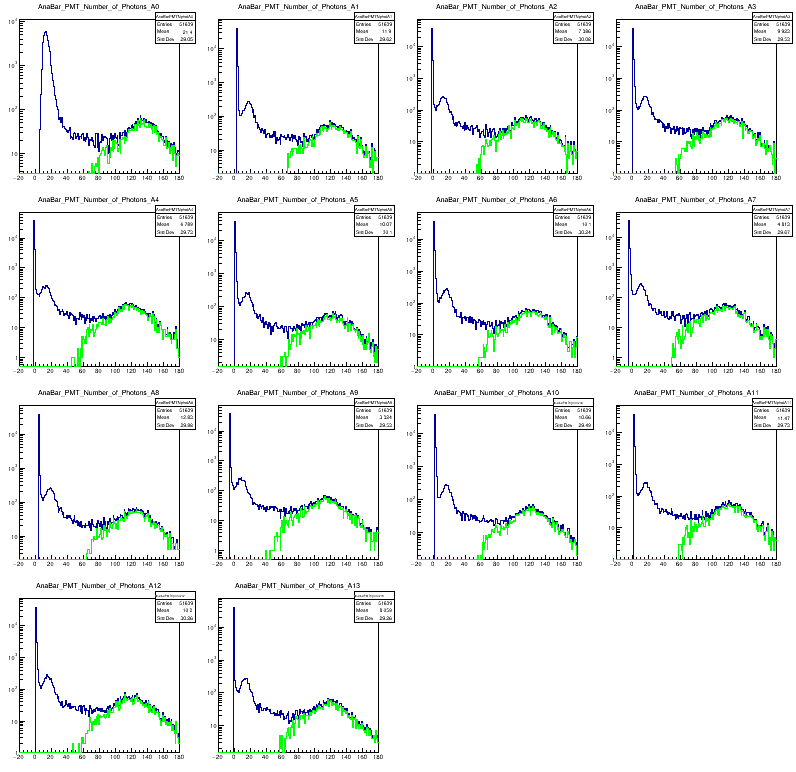

In [17]:
c9.Draw()

In [18]:
t.stop()

Elapsed time: 21.4387 seconds
